 NEW YORK CAB PROJECT

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
Taxi = pd.read_csv('/yellow_tripdata_2017-03.csv')
Taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0.00,0.3,18.36
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0.00,0.3,12.80
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0.00,0.3,14.12
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0.00,0.3,17.29
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0.00,0.3,13.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294623,1,2017-03-31 15:15:44,2017-03-31 15:16:53,2,0.00,1,Y,264,264,2,3.0,0.0,0.5,0.00,0.00,0.3,3.80
10294624,1,2017-03-31 15:21:14,2017-03-31 15:22:49,1,0.00,2,Y,264,264,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56
10294625,1,2017-03-31 15:23:11,2017-03-31 15:24:13,3,0.00,3,Y,264,264,2,20.5,0.0,0.0,0.00,5.76,0.3,26.56
10294626,1,2017-03-31 15:24:34,2017-03-31 15:26:25,2,0.00,5,Y,264,264,2,136.0,0.0,0.0,0.00,5.76,0.3,142.06


In [3]:
Taxi.head()
#displaying first 5 rows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0.0,0.3,14.12
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30


In [4]:
Taxi.size
#displaying the dataframe size


175008676

In [5]:
Taxi = Taxi.head(10000)
#Minimizing the data size for better analysis

In [6]:
#selecting only the columns needed for analysis
Taxi = Taxi[['tpep_pickup_datetime','tpep_dropoff_datetime', 'passenger_count',	'trip_distance','payment_type','fare_amount','total_amount']]

In [7]:
Taxi.isnull().sum()
#checking for null values

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
payment_type,0
fare_amount,0
total_amount,0


In [8]:
Taxi = Taxi.dropna()
#dropping null values

In [9]:
Taxi.isnull().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
payment_type,0
fare_amount,0
total_amount,0


In [10]:
#Converting datetime columns to datetime
Taxi['tpep_pickup_datetime'] = pd.to_datetime(Taxi['tpep_pickup_datetime'])
Taxi['tpep_dropoff_datetime'] = pd.to_datetime(Taxi['tpep_dropoff_datetime'])

In [11]:
#Extracting date and time of pickups
Taxi.loc[:, 'pickup_date'] = Taxi['tpep_pickup_datetime'].dt.date
Taxi.loc[:, 'pickup_time'] = Taxi['tpep_pickup_datetime'].dt.time

In [12]:
#Extracting date and time of dropoffs
Taxi.loc[:,'dropoff_date'] = Taxi['tpep_dropoff_datetime'].dt.date
Taxi.loc[:,'dropoff_time'] = Taxi['tpep_dropoff_datetime'].dt.time


In [13]:
#Minimizing datasize with needed columns
Taxi = Taxi[['passenger_count','trip_distance',	'payment_type',	'fare_amount',	'total_amount',	'pickup_date',	'pickup_time',	'dropoff_date',	'dropoff_time']]

In [14]:
Taxi.size
#Displaying size of dataframe

90000

In [15]:
Taxi.shape
#displaying number of (rows, columns)

(10000, 9)

In [16]:
Taxi.info()
#displaying valuable information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  10000 non-null  int64  
 1   trip_distance    10000 non-null  float64
 2   payment_type     10000 non-null  int64  
 3   fare_amount      10000 non-null  float64
 4   total_amount     10000 non-null  float64
 5   pickup_date      10000 non-null  object 
 6   pickup_time      10000 non-null  object 
 7   dropoff_date     10000 non-null  object 
 8   dropoff_time     10000 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 703.2+ KB


In [17]:
Taxi.describe()
#displaying statistical properties pf dataframe

,passenger_count,trip_distance,payment_type,fare_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.597400,2.846458,1.349300,12.735811,15.745311
std,1.264307,3.926824,0.496502,11.590655,14.719856
min,0.000000,0.000000,1.000000,-52.000000,-52.800000
25%,1.000000,0.900000,1.000000,6.500000,8.150000
50%,1.000000,1.500000,1.000000,9.000000,11.300000
75%,2.000000,2.680000,2.000000,13.500000,16.300000
max,6.000000,45.000000,4.000000,294.000000,359.790000


In [18]:
Taxi.columns
#displaying all the columns name

Index(['passenger_count', 'trip_distance', 'payment_type', 'fare_amount',
       'total_amount', 'pickup_date', 'pickup_time', 'dropoff_date',
       'dropoff_time'],
      dtype='object')

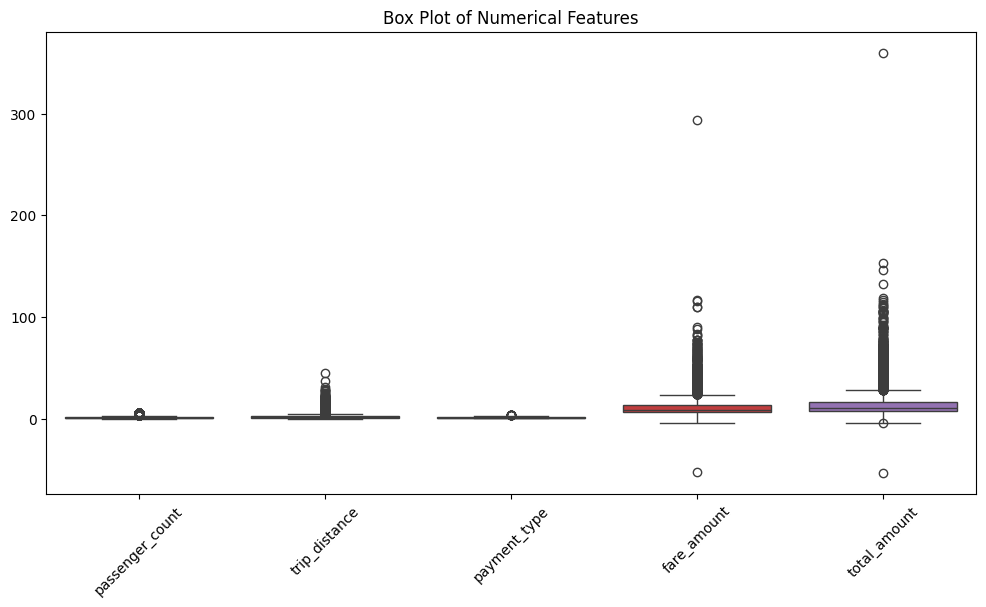

In [19]:
#Visualizing outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=Taxi)
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

We can see from the boxplots that the column total amount has the most outliers followed by fare amount and trip distance. Let us handle those outliers using capping method.

**Capping is a data cleaning technique where extreme values, or outliers, are replaced with a predefined maximum or minimum value to limit their impact on analysis.**

In [20]:
#Identifying outliers in total amount using IQR method
Q1 = Taxi['total_amount'].quantile(0.25)
Q3 = Taxi['total_amount'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

outliers_fare = Taxi[(Taxi['total_amount'] < Q1 - threshold) | (Taxi['total_amount'] > Q3 + threshold)]

#Handling outliers using capping
Taxi['total_amount'] = np.where(Taxi['total_amount'] > threshold, threshold, Taxi['total_amount'])

In [21]:
#Identifying outliers in fare amount using IQR method
Q1 = Taxi['fare_amount'].quantile(0.25)
Q3 = Taxi['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

outliers_fare = Taxi[(Taxi['fare_amount'] < Q1 - threshold) | (Taxi['fare_amount'] > Q3 + threshold)]

#Handling outliers using capping
Taxi['fare_amount'] = np.where(Taxi['fare_amount'] > threshold, threshold, Taxi['fare_amount'])


In [22]:
#Identifying outliers in trip distance using IQR method
Q1 = Taxi['trip_distance'].quantile(0.25)
Q3 = Taxi['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

outliers_fare = Taxi[(Taxi['trip_distance'] < Q1 - threshold) | (Taxi['trip_distance'] > Q3 + threshold)]

#Handling outliers using capping
Taxi['trip_distance'] = np.where(Taxi['trip_distance'] > threshold, threshold, Taxi['trip_distance'])

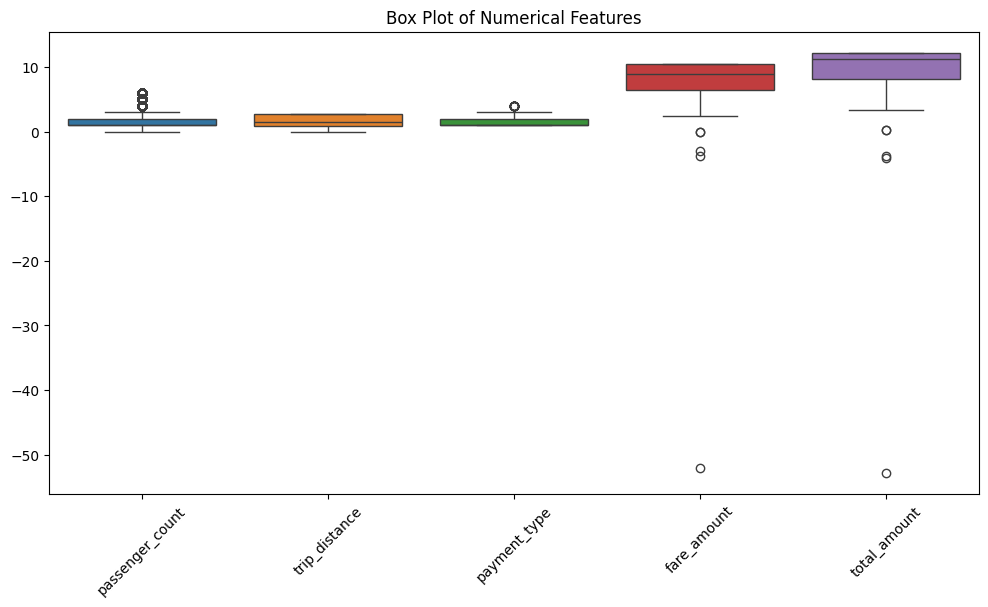

In [23]:
#Visualizing outliers after handling them
plt.figure(figsize=(12, 6))
sns.boxplot(data=Taxi)
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

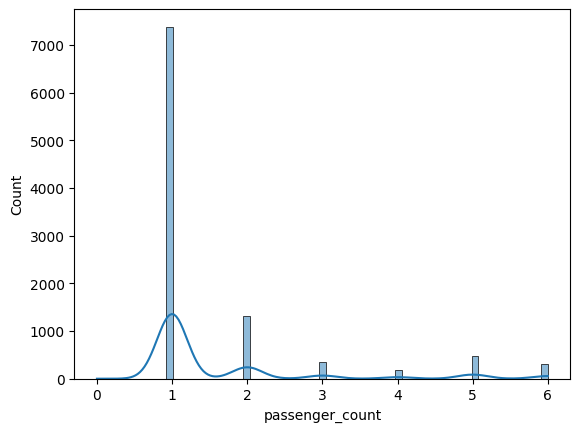

In [24]:
#Plotting passenger columns to see their distribution
sns.histplot(Taxi['passenger_count'], kde=True)
plt.show()

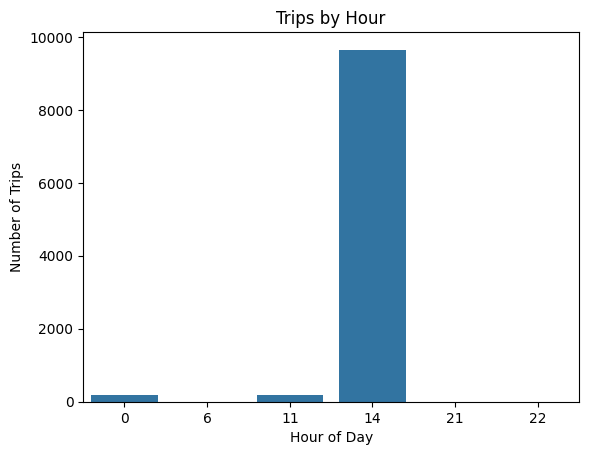

In [26]:
#Analyzing peak times
Taxi['pickup_time'] = pd.to_datetime(Taxi['pickup_time'], format='%H:%M:%S', errors='coerce')
Taxi['pickup_hour'] = Taxi['pickup_time'].dt.hour
sns.countplot(x='pickup_hour', data=Taxi)
plt.title('Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

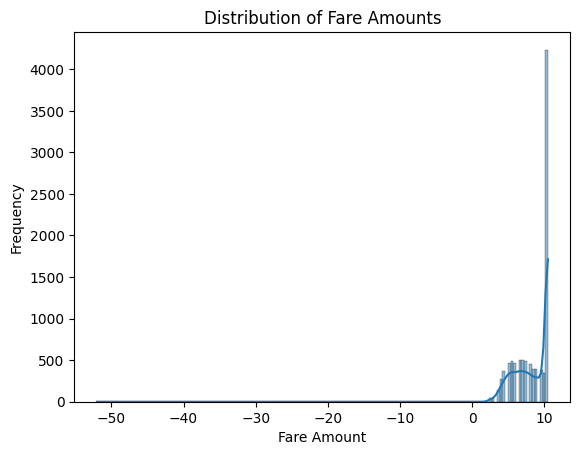

In [27]:
#Analyzing fare patterns
sns.histplot(Taxi['fare_amount'], kde=True)
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

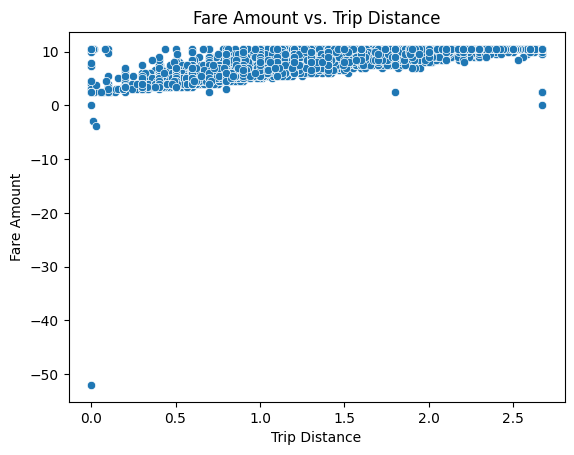

In [28]:
#PLotting fare amount against trip distance
sns.scatterplot(x='trip_distance', y='fare_amount', data=Taxi)
plt.title('Fare Amount vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

In [29]:
Taxi.to_csv('Taxi_visualization.csv', index = False)

In [30]:
#storing data in database for future analysis
import sqlite3
conn = sqlite3.connect('Taxi_data.db')
Taxi.to_sql('taxi_records', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

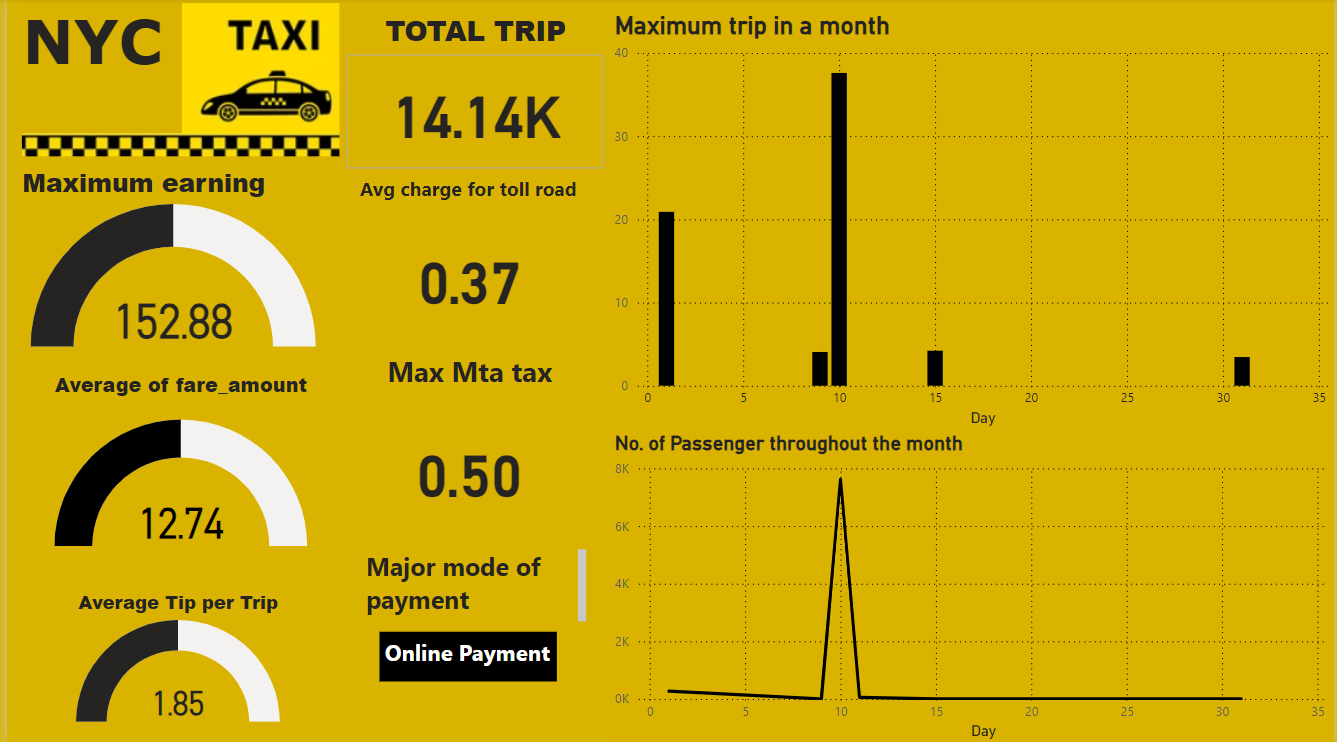

In [31]:
from google.colab.patches import cv2_imshow
import cv2

img_path = '/content/Screenshot 2024-10-28 214828.png'
img = cv2.imread(img_path)
cv2_imshow(img)
#Following is the png file of the dashboard created


**Introduction**

This report presents the findings from an analysis of a taxi dataset. The primary goal was to understand the underlying patterns and trends within the data.

**Key Findings**

**Peak Hours**
The highest number of trips occurred around 14:00 hours(around 2 pm), indicating this as the peak time for taxi services. This can be valuable for optimizing fleet management and driver scheduling.

**Fare and Distance Relationship:**
 There's a positive correlation between fare amount and trip distance. As the trip distance increases, the fare amount generally increases as well.

**Payment Methods:** Among the four payment methods, customer preferred online method to pay for their taxi fares.

   By leveraging data analysis techniques, we were able to gain valuable insights into the taxi dataset. Based on the insights gained, suggestion to allocate more resources during peak hours to meet increased demand and implement dynamic pricing strategies to adjust fares based on demand and supply can be made.
These insights can be used to improve operational efficiency, enhance customer experience, and increase revenue. It is crucial to continuously monitor and analyze data to adapt to changing trends and emerging opportunities.

